In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 66% 17.0M/25.7M [00:00<00:00, 176MB/s]
100% 25.7M/25.7M [00:00<00:00, 172MB/s]


In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip


Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('/content/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
data['sentiment'] = [1 if i == 'positive' else 0 for i in data['sentiment'] ]
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


<Axes: xlabel='sentiment', ylabel='count'>

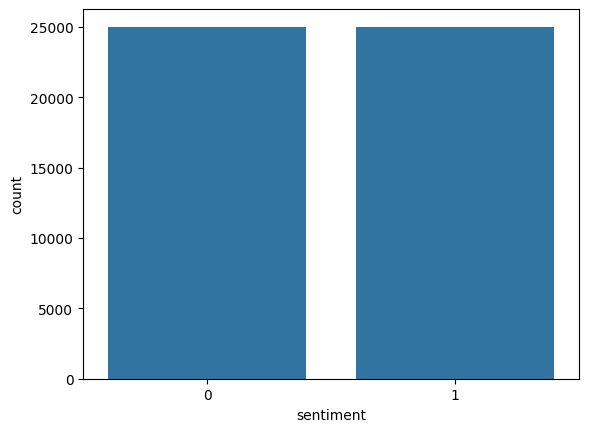

In [ ]:
sns.countplot(x='sentiment' ,data=data)

In [ ]:
porterStemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_review(review):
    words = word_tokenize(review.lower())
    stemmed_words = [porterStemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(stemmed_words)


data['cleaned_review'] = data['review'].apply(clean_review)
data[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one review mention watch 1 oz episod 'll hook ...
1,A wonderful little production. <br /><br />The...,wonder littl product . < br / > < br / > film ...
2,I thought this was a wonderful way to spend ti...,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,basic 's famili littl boy ( jake ) think 's zo...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei 's `` love time money '' visual ...


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

data['cleaned_review'] = data['cleaned_review'].apply(clean_text)
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one review mention watch oz episod ll hook rig...
1,A wonderful little production. <br /><br />The...,1,wonder littl product film techniqu unassuming ...
2,I thought this was a wonderful way to spend ti...,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,basic s famili littl boy jake think s zombi cl...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love time money visual stun fi...


In [ ]:
data['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
data['cleaned_review'][1]

'wonder littl product film techniqu unassuming oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master s comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel s mural decor everi surfac terribl well done'

In [ ]:
data.drop('review',axis=1,inplace=True)
data.head()

,sentiment,cleaned_review
0,1,one review mention watch oz episod ll hook rig...
1,1,wonder littl product film techniqu unassuming ...
2,1,thought wonder way spend time hot summer weeke...
3,0,basic s famili littl boy jake think s zombi cl...
4,1,petter mattei s love time money visual stun fi...


In [ ]:
data.shape

(50000, 2)

In [ ]:
sentences = data['cleaned_review'].tolist()
labels = data['sentiment'].tolist()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
X = pad_sequences(sequences)
y = np.array(labels)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X.shape[1]),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 54ms/step - accuracy: 0.7857 - loss: 0.4421 - val_accuracy: 0.8920 - val_loss: 0.2626
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 55ms/step - accuracy: 0.9350 - loss: 0.1823 - val_accuracy: 0.8820 - val_loss: 0.2948
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 50ms/step - accuracy: 0.9624 - loss: 0.1080 - val_accuracy: 0.8722 - val_loss: 0.4034
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9715 - loss: 0.0836 - val_accuracy: 0.8669 - val_loss: 0.4456
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.9833 - loss: 0.0536 - val_accuracy: 0.8839 - val_loss: 0.4621
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 50ms/step - accuracy: 0.9908 - loss: 0.0316 - val_accuracy: 0.8724 - val_loss: 0.4918
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9923 - loss: 0.0275 - val_accuracy: 0.8761 - val_loss: 0.5145
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.9945 

In [ ]:
# Save model
model.save('sentiment_model.h5')


In [ ]:
model.save('sentiment_model.keras')

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8723 - loss: 0.5905
Test Loss: 0.6160407662391663
Test Accuracy: 0.8747000098228455


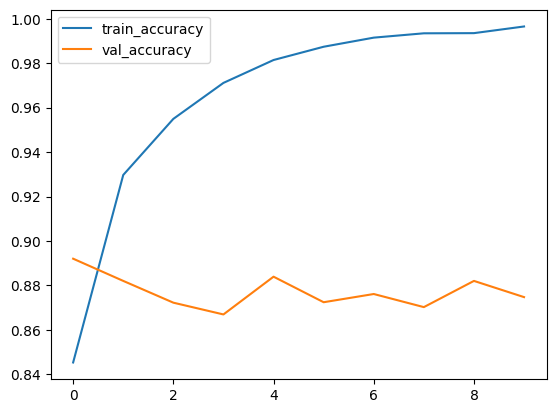

In [ ]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

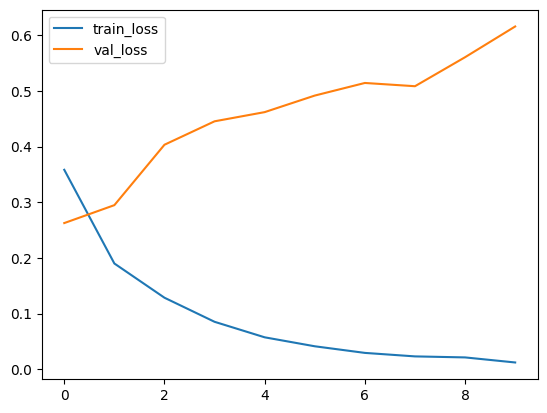

In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()

In [ ]:
prediction = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [ ]:
prediction

array([[9.6374464e-01],
       [9.9997377e-01],
       [1.8678648e-04],
       ...,
       [9.9976236e-01],
       [5.1355355e-06],
       [9.9997258e-01]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
prediction = [1 if i > 0.5 else 0 for i in prediction]
accuracy_score(prediction,y_test)

0.8747

In [ ]:
def predict_function(text):
    text = clean_review(text)
    text = clean_text(text)

    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=X.shape[1])
    prediction = model.predict(padded_sequence)[0][0]
    sentiment = 'positive' if prediction > 0.5 else 'negative'
    confidence = prediction * 100 if sentiment == 'positive' else (1 - prediction) * 100

    return f'The review is {sentiment} with {confidence:.2f}% confidence.'

In [ ]:
text = 'I absolutely hated this movie. It was bad'
prediction = predict_function(text)
print(f'This review "{text}" is: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
This review "I absolutely hated this movie. It was bad" is: The review is negative with 99.62% confidence.


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr


def predict_function(text):

    text = clean_review(text)
    text = clean_text(text)

    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=X.shape[1])

    prediction = model.predict(padded_sequence)[0][0]
    sentiment = 'positive' if prediction > 0.5 else 'negative'
    confidence = prediction * 100 if sentiment == 'positive' else (1 - prediction) * 100
    return f'The review is {sentiment} with {confidence:.2f}% confidence.'

with gr.Blocks() as demo:

    gr.Markdown("# Movie Review Sentiment Analysis")
    review_input = gr.Textbox(label="Enter a movie review", placeholder="Type your review here...")
    output_label = gr.Label(label="Sentiment Prediction")
    analyze_button = gr.Button("Analyze")
    analyze_button.click(fn=predict_function, inputs=review_input, outputs=output_label)

# Launch the Gradio app
demo.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6978471569bab1f8b0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
